In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plotly imports
from plotly import plotly as py
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#py.initnotebookmode(connected=True) # this code, allow us to work with offline plotly version
# Using plotly + cufflinks in offline mode
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)

 #sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score


import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse

In [112]:
df_sourcefile = pd.read_csv('NWMHackathonAIDataset.csv')
print("Shape of dataframe is: {}".format(df_sourcefile.shape))


Shape of dataframe is: (1470, 35)


In [113]:
df_HR = df_sourcefile[['EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction']]

In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
HR_col = df_HR.columns

for col in HR_col:
    df_HR[col] = df_HR[col].astype(float)
    df_HR[[col]] = scaler.fit_transform(df_HR[[col]])

df_HR.head()


,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction
0,0.333333,1.000000,0.000000
1,0.666667,0.333333,1.000000
2,1.000000,0.666667,0.333333
3,1.000000,0.666667,0.666667
4,0.000000,0.333333,1.000000


In [115]:
def cal_mot(a,b,c) :
    return (a + b + c)/3    

In [116]:
df_HR['Motivation'] = df_HR.apply(lambda row : cal_mot(row['EnvironmentSatisfaction'], row['JobSatisfaction'], row['RelationshipSatisfaction']), axis = 1)


In [117]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_HR['Motivation'] = df_HR['Motivation'].astype(float)
df_HR[['Motivation']] = scaler.fit_transform(df_HR[['Motivation']])

In [118]:
df_HR['Motivation'].describe()

count    1470.000000
mean        0.573621
std         0.209413
min         0.000000
25%         0.444444
50%         0.555556
75%         0.777778
max         1.000000
Name: Motivation, dtype: float64

In [119]:
df_sourcefile['Motivation'] = df_HR['Motivation']
df_sourcefile.head(5)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Motivation
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes,0.444444
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No,0.666667
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes,0.666667
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No,0.777778
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No,0.444444


In [120]:
df_HR_trans = df_sourcefile.copy()
df_HR_trans = df_HR_trans.drop(
    ['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
correlations = df_HR_trans.corr()['Motivation'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))


('Most Positive Correlations: \n', Age                         0.033733
RelationshipSatisfaction    0.570829
JobSatisfaction             0.574072
EnvironmentSatisfaction     0.580398
Motivation                  1.000000
Name: Motivation, dtype: float64)
('\nMost Negative Correlations: \n', HourlyRate             -0.069894
PerformanceRating      -0.033778
PercentSalaryHike      -0.029910
Education              -0.027574
YearsWithCurrManager   -0.019580
Name: Motivation, dtype: float64)


In [121]:
len(df_sourcefile[col].unique())

4

In [122]:
le = LabelEncoder()

le_count = 0
for col in df_sourcefile.columns[1:]:
    if df_sourcefile[col].dtype == 'object':
        if len(df_sourcefile[col].unique()) <= 2:
            le.fit(df_sourcefile[col])
            df_sourcefile[col] = le.transform(df_sourcefile[col])
            le_count += 1
le_count

4

In [123]:
df_sourcefile = pd.get_dummies(df_sourcefile, drop_first=True)

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
HR_col = df_sourcefile.columns
for col in HR_col:
    df_sourcefile[col] = df_sourcefile[col].astype(float)
    df_sourcefile[[col]] = scaler.fit_transform(df_sourcefile[[col]])

df_sourcefile.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Motivation,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,0.715820,0.000000,0.25,0.0,0.000000,0.333333,0.0,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,0.0,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,1.0,0.444444,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.0,0.000484,0.666667,1.0,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,0.0,0.0,0.857143,1.0,1.000000,0.0,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,0.0,0.666667,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,0.0,0.001451,1.000000,1.0,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,0.0,1.0,0.285714,0.0,0.333333,0.0,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,1.0,0.666667,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,0.0,0.001935,1.000000,0.0,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,0.0,1.0,0.000000,0.0,0.666667,0.0,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,0.0,0.777778,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.214286,0.350036,0.035714,0.00,0.0,0.002903,0.000000,1.0,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0.0,0.0,0.071429,0.0,1.000000,0.0,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,0.0,0.444444,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [125]:
df_sourcefile['Motivation'].describe()

count    1470.000000
mean        0.573621
std         0.209413
min         0.000000
25%         0.444444
50%         0.555556
75%         0.777778
max         1.000000
Name: Motivation, dtype: float64

In [129]:
import statistics
statistics.median(df_sourcefile['Motivation'])

0.5555555555555556

In [135]:
df_sourcefile['Motivation'] = df_sourcefile['Motivation'].apply(
    lambda x: 0 if x < 0.7 else 1)

KeyError: 'Motivation'

In [92]:
target = df_sourcefile['Motivation'].copy()
target

0       0
1       0
2       0
3       1
4       0
5       1
6       0
7       0
8       0
9       0
10      0
11      1
12      0
13      1
14      0
15      0
16      0
17      0
18      1
19      1
20      0
21      0
22      0
23      1
24      0
25      0
26      0
27      0
28      1
29      0
       ..
1440    0
1441    0
1442    1
1443    0
1444    0
1445    0
1446    1
1447    0
1448    0
1449    0
1450    1
1451    1
1452    1
1453    0
1454    1
1455    1
1456    1
1457    0
1458    1
1459    0
1460    0
1461    0
1462    0
1463    0
1464    1
1465    1
1466    0
1467    0
1468    0
1469    0
Name: Motivation, Length: 1470, dtype: int64

In [131]:
df_sourcefile.drop(['Motivation','EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'],axis=1, inplace=True)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(df_sourcefile,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

('Number transactions X_train dataset: ', (1102, 45))
('Number transactions y_train dataset: ', (1102,))
('Number transactions X_test dataset: ', (368, 45))
('Number transactions y_test dataset: ', (368,))


In [133]:
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7,max_depth=15, n_estimators=100)
print(str(rf_classifier.score))


print('='*20)

<bound method RandomForestClassifier.score of RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False, random_state=7,
            verbose=0, warm_start=False)>


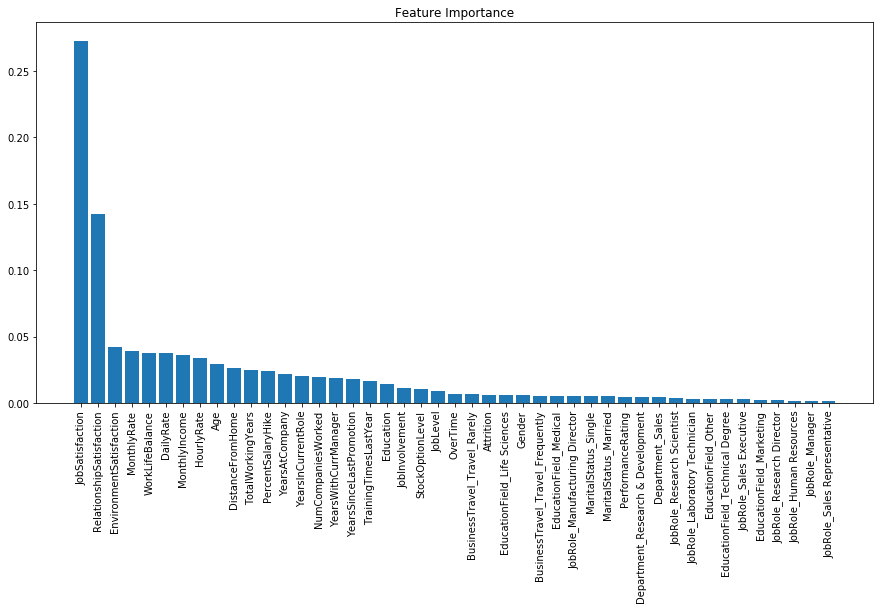

In [134]:
rf_fit = rf_classifier.fit(X_train,y_train)
importances = rf_fit.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot